## 3251 TERM PROJECT 

### PREDICTING MEDICAL EXPENSES USING LINEAR REGRESSION

<ul> Columns

<li> age: age of primary beneficiary
<li> sex: insurance contractor gender, female, male
<li> bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to <li> height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
<li> children: Number of children covered by health insurance / Number of dependents
<li> smoker: Smoking
<li> region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
<li> charges: Individual medical costs billed by health insurance

In [1]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as sm
import scipy, scipy.stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
pd.options.display.max_rows = 10

In [2]:
#Load data
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


The beneficiaries' ages range from 18 years to 64 years. 
The average, medical cost is USD 13,270 with a median value of USD 9382.

In [5]:
df.groupby("sex")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
female,662.0,12569.578844,11128.703801,1607.5101,4885.1587,9412.96250,14454.691825,63770.42801
male,676.0,13956.751178,12971.025915,1121.8739,4619.1340,9369.61575,18989.590250,62592.87309


In [6]:
df.groupby("smoker")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


In [7]:
df.groupby("region")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
northeast,324.0,13406.384516,11255.803066,1694.7964,5194.322288,10057.652025,16687.3641,58571.07448
northwest,325.0,12417.575374,11072.276928,1621.3402,4719.736550,8965.795750,14711.7438,60021.39897
southeast,364.0,14735.411438,13971.098589,1121.8739,4440.886200,9294.131950,19526.2869,63770.42801
southwest,325.0,12346.937377,11557.179101,1241.5650,4751.070000,8798.593000,13462.5200,52590.82939


In [8]:
#check if there is null data
df.isnull().count()

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [9]:
#female =0 male=1
lb_sex = LabelEncoder()
df["sex"]=lb_sex.fit_transform(df["sex"])
sex_OHE=OneHotEncoder(categorical_features=[1])

# smoker =1 non-smoker =0
lb_smoker=LabelEncoder()
df["smoker"] = lb_smoker.fit_transform(df["smoker"])
smoker_OHE=OneHotEncoder(categorical_features=[4])

#regiona
lb_region=LabelEncoder()
df["region"]=lb_region.fit_transform(df["region"])
region_OHE=OneHotEncoder(categorical_features=[5])

df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [10]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


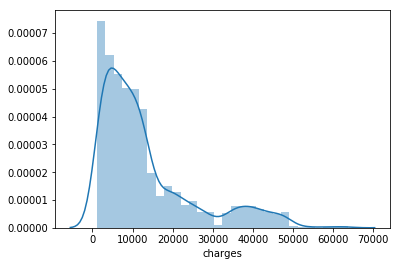

In [11]:
sns.distplot(df["charges"], bins=30)
plt.show()

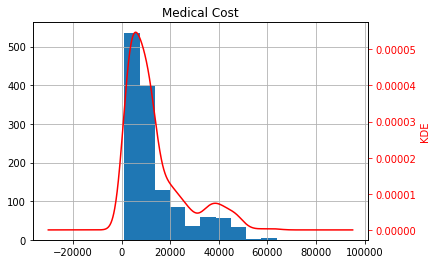

In [12]:
plt.figure()
ax= df.charges.hist(label='Medical Cost')
ax2 = ax.twinx()
df.charges.plot(kind='kde',color='r') #label='KDE'
ax2.set_ylabel('KDE', color='r')
ax2.tick_params('y', colors='r')
#plt.legend(loc='upper right', bbox_to_anchor=(1, 0.94))
plt.title('Medical Cost');

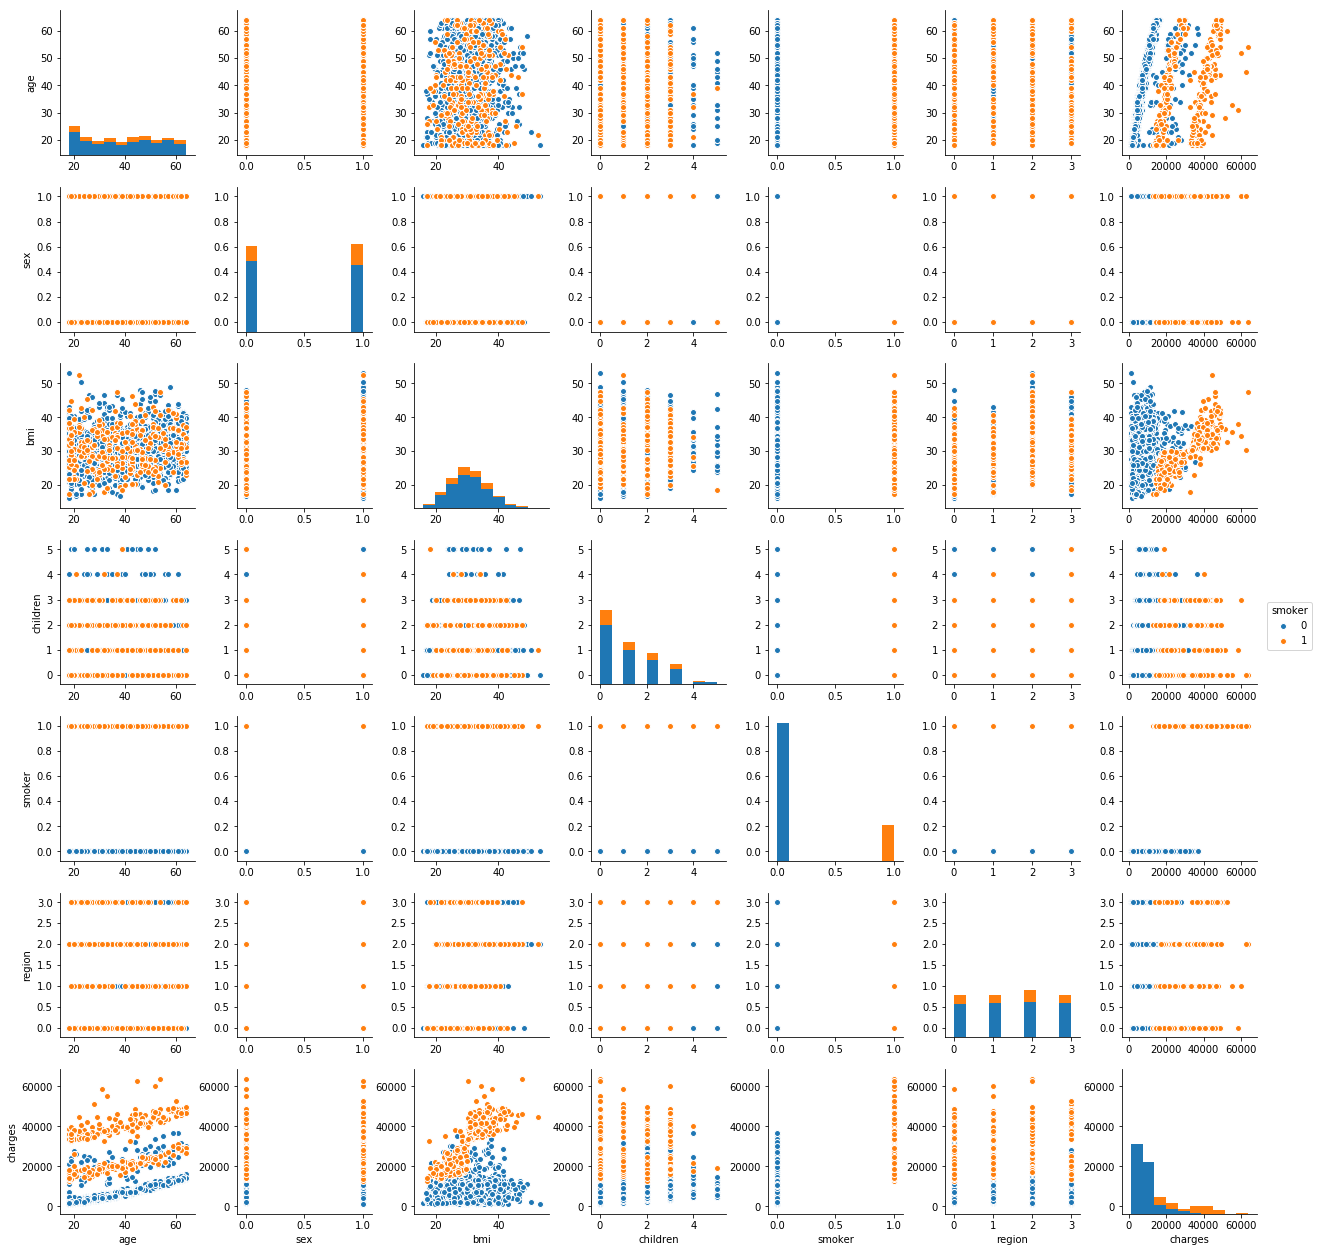

In [13]:
sns.pairplot(df, hue='smoker')

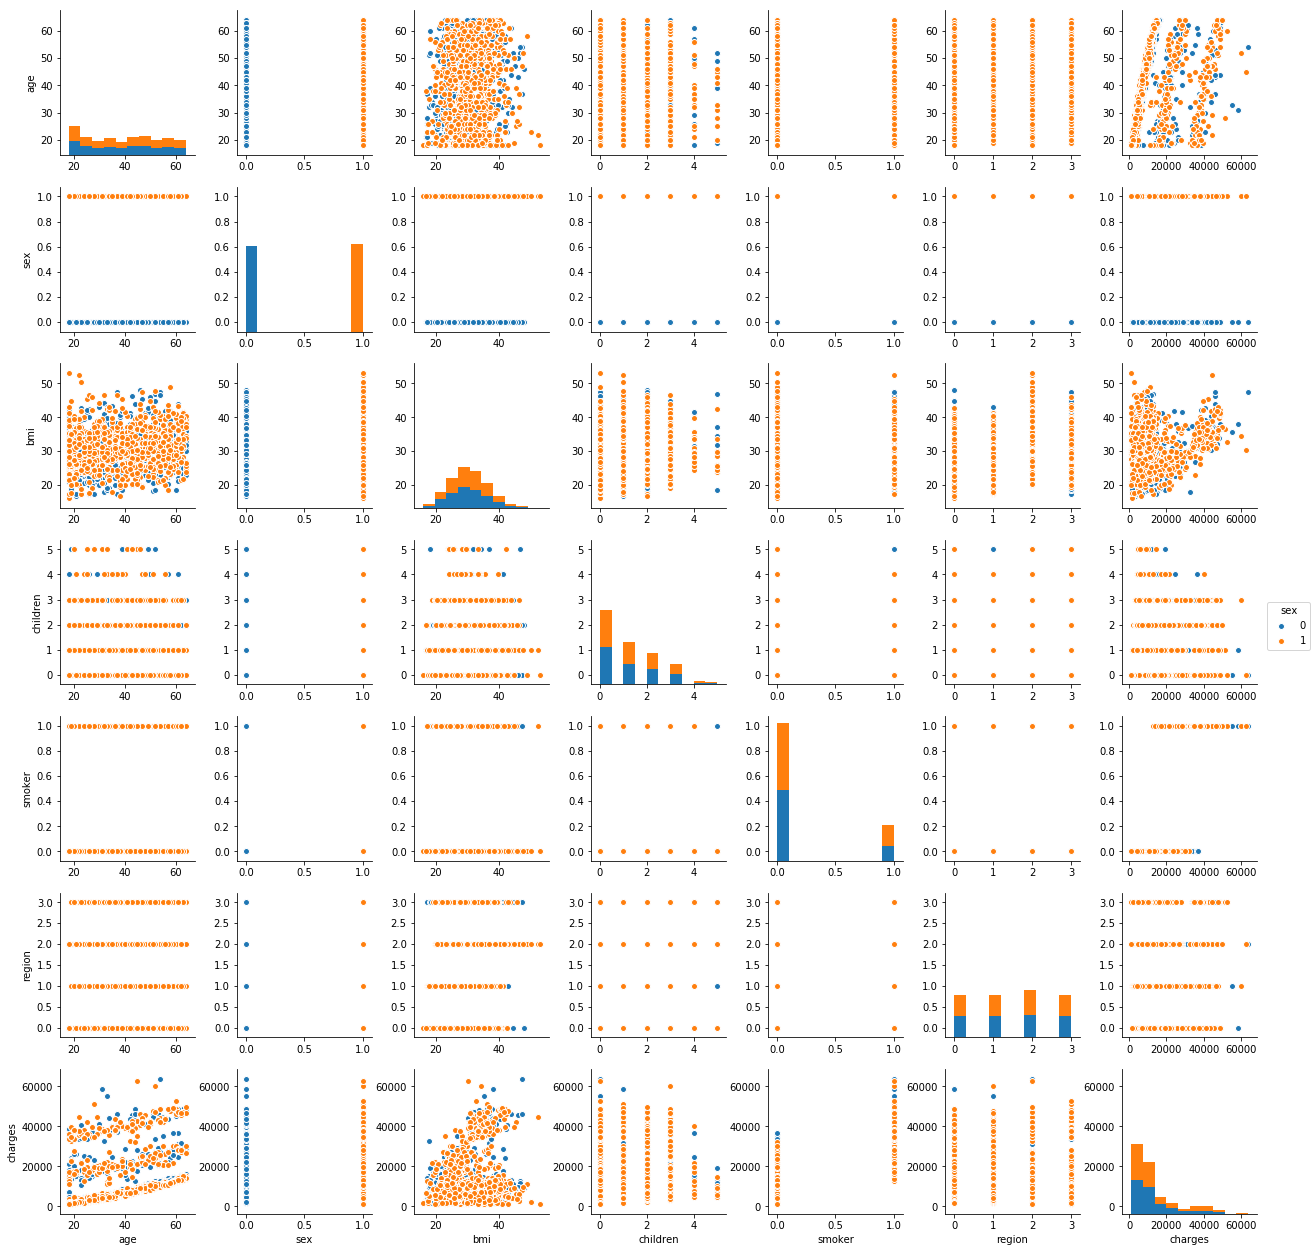

In [14]:
sns.pairplot(df, hue='sex')

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


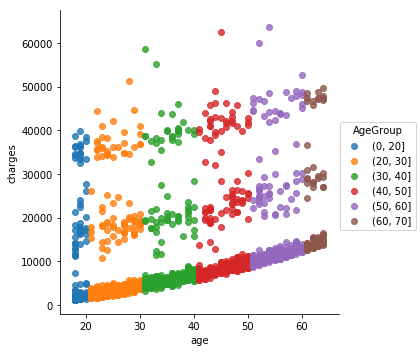

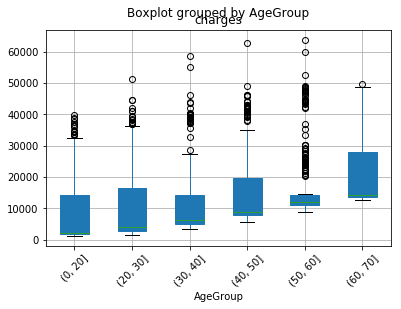

In [15]:
bins1=[0,20,30,40,50,60,70]
df['AgeGroup']=pd.cut(df['age'], bins1)
data=pd.value_counts(df['AgeGroup']).sort_index()
sns.lmplot(x="age", y="charges", data=df, fit_reg=False, hue='AgeGroup')
df.boxplot(column='charges', by='AgeGroup',patch_artist=True, rot=45)

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


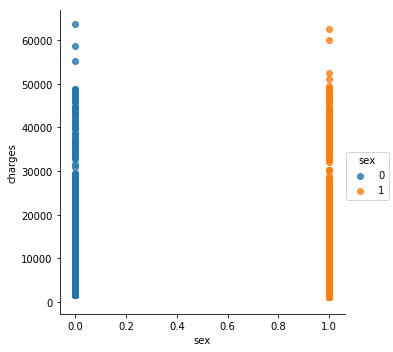

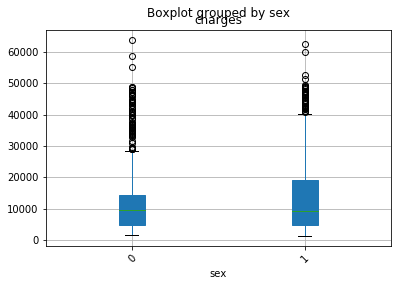

In [16]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sex", y="charges", data=df, fit_reg=False, hue='sex')
df.boxplot(column='charges', by='sex',patch_artist=True, rot=45)

<ul> Underweight: Your BMI is less than 18.5 </ul>
<ul> Healthy weight: Your BMI is 18.5 to 24.9. </ul>
<ul> Overweight: Your BMI is 25 to 29.9.</ul>
<ul> Obese: Your BMI is 30 or higher </ul>

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


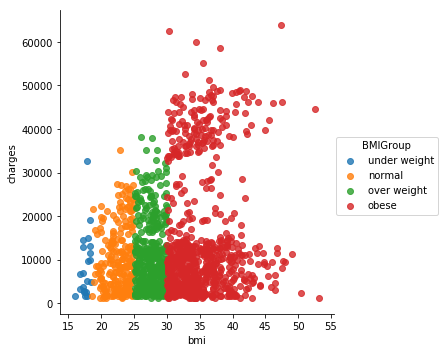

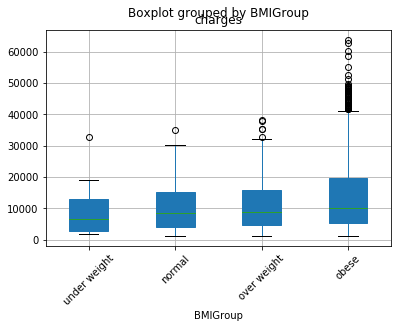

In [17]:
bins2=[0,18.5,25,30,55]
labels=['under weight', 'normal', 'over weight', 'obese']
df['BMIGroup']=pd.cut(df['bmi'], bins=bins2, labels=labels)
sns.lmplot(x="bmi", y="charges", data=df, fit_reg=False, hue='BMIGroup')
df.boxplot(column='charges', by='BMIGroup',patch_artist=True, rot=45)

In [18]:
df.groupby("BMIGroup")['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
BMIGroup,,,,,,,,
under weight,21.0,8657.620652,7591.730101,1621.3402,2775.192150,6640.544850,12829.455100,32734.18630
normal,226.0,10435.440719,7484.434940,1121.8739,4146.836312,8604.153525,15197.264325,35069.37452
over weight,386.0,10997.803881,8067.254166,1252.4070,4593.881375,8659.378000,15751.161360,38245.59327
obese,705.0,15560.926321,14563.057442,1131.5066,5240.765000,9964.060000,19673.335730,63770.42801


People who are obsese pay USD5000 more in average

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


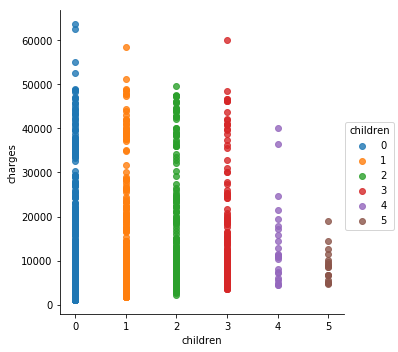

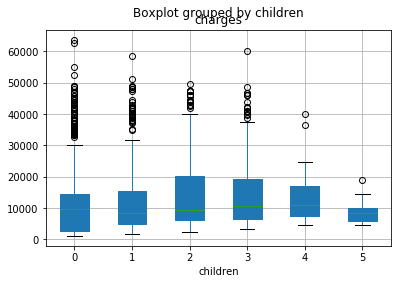

In [19]:
sns.lmplot(x="children", y="charges", data=df, fit_reg=False, hue='children')
df.boxplot(column='charges', by='children',patch_artist=True)

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


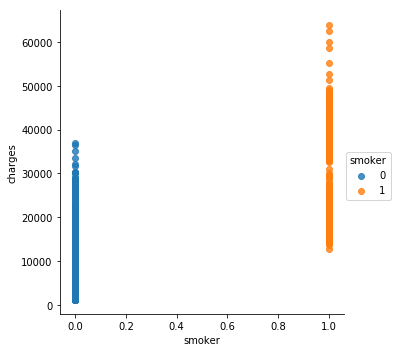

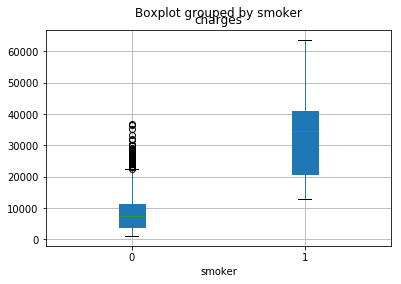

In [20]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot(x="smoker", y="charges", data=df, fit_reg=False, hue='smoker')
df.boxplot(column='charges', by='smoker',patch_artist=True)

In [39]:
result = sm.ols(formula='df.charges ~ df.smoker', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.620
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     2178.
Date:                Mon, 06 Aug 2018   Prob (F-statistic):          8.27e-283
Time:                        14:36:47   Log-Likelihood:                -13831.
No. Observations:                1338   AIC:                         2.767e+04
Df Residuals:                    1336   BIC:                         2.768e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8434.2683    229.014     36.829      0.000    7985.002    8883.535
df.smoker   2.362e+04    506.075     46.665      0.000    2.26e+04    2.46e+04
==============================================================================
Omnibus:                      135.996   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              212.201
Skew:                           0.727   Prob(JB):                     8.34e-47
Kurtosis:                       4.300   Cond. No.                         2.60
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

/Users/kimchaewon/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


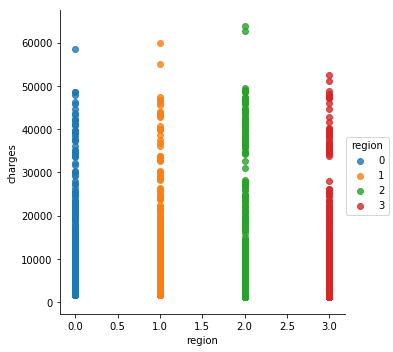

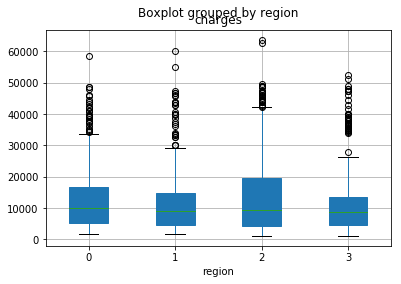

In [22]:
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="region", y="charges", data=df, fit_reg=False, hue='region')
df.boxplot(column='charges', by='region',patch_artist=True)

In [23]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


We can see that age has the highest correlation with charges amongst our numeric variables. Another observation we can make from this plot is that none of our numeric values is highly correlated with each other, so multicollinearity wouldn’t be a problem. Another thing to note is that the relationship between age and charges might not be really linear at all.

In [40]:
result1 = sm.ols(formula='df.charges ~ df.age+df.sex+df.bmi+df.children+df.smoker+df.region', data=df).fit()
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     668.1
Date:                Mon, 06 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:37:01   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1331   BIC:                         2.715e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.182e+04    955.130    -12.371      0.000   -1.37e+04   -9941.729
df.age        257.2881     11.886     21.647      0.000     233.971     280.605
df.sex       -131.1106    332.811     -0.394      0.694    -784.001     521.780
df.bmi        332.5701     27.722     11.997      0.000     278.186     386.954
df.children   479.3694    137.644      3.483      0.001     209.346     749.393
df.smoker    2.382e+04    411.843     57.839      0.000     2.3e+04    2.46e+04
df.region    -353.6400    151.927     -2.328      0.020    -651.682     -55.598
==============================================================================
Omnibus:                      299.003   Durbin-Watson:                   2.088
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              713.975
Skew:                           1.207   Prob(JB):                    9.17e-156
Kurtosis:                       5.642   Cond. No.                         296.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On the first model we only utilized those original variables included in the dataset and got a decent r-squared of 0.7509 which implies that 75.09% of the variation of charges could be explained by the set of independent variables we have included. We could also observe that all of the independent variables we have included with the exception of gender is a statistically significant predictor of medical charges (p-value less than 0.05 <- level of significance).

In [46]:
result = sm.ols(formula='df.charges ~ ', data=df).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.747
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     1316.
Date:                Mon, 06 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:39:11   Log-Likelihood:                -13557.
No. Observations:                1338   AIC:                         2.712e+04
Df Residuals:                    1334   BIC:                         2.714e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.168e+04    937.569    -12.454      0.000   -1.35e+04   -9837.561
df.age       259.5475     11.934     21.748      0.000     236.136     282.959
df.smoker   2.382e+04    412.867     57.703      0.000     2.3e+04    2.46e+04
df.bmi       322.6151     27.487     11.737      0.000     268.692     376.538
==============================================================================
Omnibus:                      299.709   Durbin-Watson:                   2.077
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              710.137
Skew:                           1.213   Prob(JB):                    6.25e-155
Kurtosis:                       5.618   Cond. No.                         289.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
#Second model using derived variables

result2 = sm.ols(formula='df.charges ~ df.age+df.children+df.bmi+df.sex+df.bmi*df.smoker+df.region', data=df).fit()
result2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     1003.
Date:                Mon, 06 Aug 2018   Prob (F-statistic):               0.00
Time:                        16:03:06   Log-Likelihood:                -13248.
No. Observations:                1338   AIC:                         2.651e+04
Df Residuals:                    1330   BIC:                         2.655e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2186.8734    840.597     -2.602      0.009   -3835.915    -537.832
df.age             264.0080      9.507     27.770      0.000     245.358     282.659
df.children        518.6828    110.070      4.712      0.000     302.752     734.613
df.bmi              18.0132     24.960      0.722      0.471     -30.952      66.978
df.sex            -499.5425    266.456     -1.875      0.061   -1022.263      23.178
df.smoker        -2.043e+04   1647.304    -12.404      0.000   -2.37e+04   -1.72e+04
df.bmi:df.smoker  1442.9607     52.628     27.418      0.000    1339.717    1546.204
df.region         -429.6830    121.513     -3.536      0.000    -668.061    -191.305
==============================================================================
Omnibus:                      718.851   Durbin-Watson:                   2.070
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4409.518
Skew:                           2.521   Prob(JB):                         0.00
Kurtosis:                      10.327   Cond. No.                         662.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

First thing I did in this chunk is to create a new variable age2 which is basically age squared. Like I’ve said earlier, relationship between age and charges might not be totally linear so the idea behind this is to include the variable age2 to deal with this non-linearity in our model.

As we can see, by adding those variables we have derived has significantly improved our model. We now have a r-squared of 0.8664 which implies 86.64% of variation of charges can be explained by our independent variables in the model. Adjusted R-squared of the second model is also a lot better compared to that of the previous one which further solidify our claim.

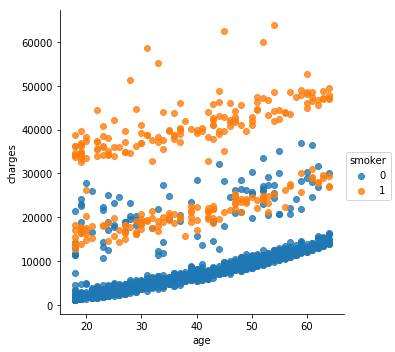

In [27]:
sns.lmplot(x="age", y="charges", data=df, fit_reg=False, hue='smoker')

In [28]:
result3 = sm.ols(formula='df.charges ~ df.age+df.smoker', data=df).fit()
result3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             df.charges   R-squared:                       0.721
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     1728.
Date:                Mon, 06 Aug 2018   Prob (F-statistic):               0.00
Time:                        14:08:13   Log-Likelihood:                -13623.
No. Observations:                1338   AIC:                         2.725e+04
Df Residuals:                    1335   BIC:                         2.727e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2391.6264    528.302     -4.527      0.000   -3428.019   -1355.234
df.age       274.8712     12.455     22.069      0.000     250.437     299.305
df.smoker   2.386e+04    433.488     55.031      0.000     2.3e+04    2.47e+04
==============================================================================
Omnibus:                      265.239   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              636.675
Skew:                           1.074   Prob(JB):                    5.59e-139
Kurtosis:                       5.609   Cond. No.                         130.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
X_pred = df[["age","smoker","bmi"]]
X_pred

,age,smoker,bmi
0,19,1,27.900
1,18,0,33.770
2,28,0,33.000
3,33,0,22.705
4,32,0,28.880
...,...,...,...
1333,50,0,30.970
1334,18,0,31.920
1335,18,0,36.850
1336,21,0,25.800


In [30]:
Y_ols_pred = result2.predict(X_pred)

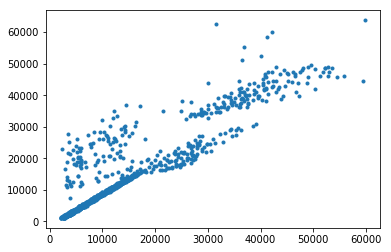

In [31]:
plt.plot(Y_ols_pred, df.charges, 'o', label='Original data', markersize=3)
#intercept, slope = result2.params
#plt.plot(df.Cost_Living, intercept + slope * df.Cost_Living , 'r-', label='Fitted Line')
#plt.legend()
#plt.show()

In [32]:
Residual_full= df.charges - Y_ols_pred

((array([-3.28061069, -3.02161974, -2.87748242, ...,  2.87748242,
          3.02161974,  3.28061069]),
  array([-14968.09278518,  -9682.66981085,  -8567.57113223, ...,
          22969.68258164,  24162.96883057,  31133.18289358])),
 (3756.9449007793291, 2.7991305243737364e-09, 0.78229962301691069))

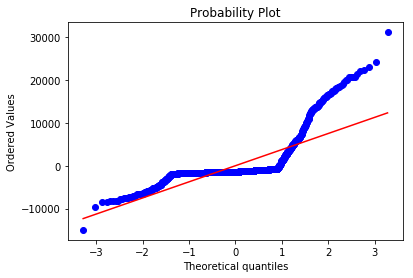

In [33]:
scipy.stats.probplot(Residual_full, sparams=(), dist='norm', fit=True, plot=plt)

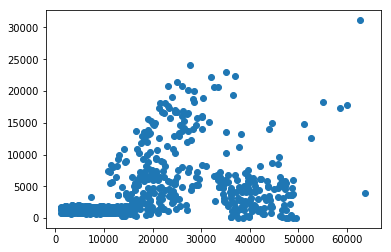

In [34]:
plt.scatter(df.charges, abs(Residual_full))